In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import tensorflow as tf 
from tensorflow.keras.layers import Dense , Input , LSTM , GlobalMaxPooling1D , Embedding
from tensorflow.keras.models import Model 
from tensorflow.keras.optimizers import Adam, SGD 

from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('spam.csv' , encoding = 'ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df.drop(['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] , axis = 1)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.columns = ['labels' , 'data']

In [13]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df['b_labels'] = df['labels'].map({'ham' : 0 , 'spam' : 1})

In [15]:
Y = df['b_labels'].values

In [17]:
df_train , df_test , Y_train , Y_test = train_test_split(df['data'] , Y , test_size = 0.3)

In [18]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [19]:
word_idx = tokenizer.word_index

In [30]:
type(word_idx)

dict

In [35]:
word_idx

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'is': 8,
 'in': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'of': 14,
 'it': 15,
 'have': 16,
 'call': 17,
 '2': 18,
 'on': 19,
 'that': 20,
 'now': 21,
 'are': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'at': 26,
 'ur': 27,
 'or': 28,
 'will': 29,
 'can': 30,
 'do': 31,
 "i'm": 32,
 'with': 33,
 'get': 34,
 'be': 35,
 'if': 36,
 'no': 37,
 'just': 38,
 'we': 39,
 'gt': 40,
 'lt': 41,
 'this': 42,
 '4': 43,
 'up': 44,
 'when': 45,
 'ok': 46,
 'all': 47,
 'go': 48,
 'what': 49,
 'free': 50,
 'from': 51,
 'how': 52,
 'out': 53,
 'was': 54,
 'like': 55,
 'its': 56,
 'good': 57,
 'know': 58,
 'time': 59,
 'then': 60,
 'am': 61,
 'got': 62,
 'day': 63,
 'come': 64,
 'only': 65,
 'there': 66,
 'he': 67,
 'text': 68,
 'going': 69,
 'send': 70,
 'as': 71,
 'love': 72,
 'want': 73,
 'need': 74,
 'by': 75,
 'still': 76,
 'one': 77,
 'txt': 78,
 'about': 79,
 'r': 80,
 'today': 81,
 'lor': 82,
 'back': 83,
 'sorry': 84,
 '

In [20]:
V = len(word_idx)

In [21]:
V   # total number of unique words

7474

In [22]:
data_train = pad_sequences(sequences_train)

In [23]:
data_train.shape    # NxT

(3900, 189)

In [24]:
T = data_train.shape[1]

In [25]:
T

189

In [26]:
data_test = pad_sequences(sequences_test , maxlen=T)

In [27]:
data_test.shape

(1672, 189)

In [28]:
Y_train.shape

(3900,)

In [40]:
D = 20    #embedding dimensionality, can choose any number as it's a hyperparameter

M = 15   # hidden state dimensionality

# Note : We actually want the size of the embedding to (V+1)xD 
# because the first index starts from 1 and not 0
# Thus if the final index of the embedding matrix is V 
# it must have size V+1

i = Input(shape=data_train.shape[1])
x = Embedding(V + 1 , D)(i)
x = LSTM(M , return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i,x)


model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [41]:
r = model.fit(data_train, Y_train , epochs = 10 , validation_data = (data_test , Y_test))

Epoch 1/10
122/122 [==============================] - 7s 56ms/step - loss: 0.5034 - accuracy: 0.8451 - val_loss: 0.4095 - val_accuracy: 0.8571
Epoch 2/10
122/122 [==============================] - 6s 50ms/step - loss: 0.3639 - accuracy: 0.8697 - val_loss: 0.3310 - val_accuracy: 0.8571
Epoch 3/10
122/122 [==============================] - 6s 50ms/step - loss: 0.2800 - accuracy: 0.8697 - val_loss: 0.2706 - val_accuracy: 0.8571
Epoch 4/10
122/122 [==============================] - 6s 50ms/step - loss: 0.2208 - accuracy: 0.8697 - val_loss: 0.2158 - val_accuracy: 0.8571
Epoch 5/10
122/122 [==============================] - 6s 50ms/step - loss: 0.1710 - accuracy: 0.9187 - val_loss: 0.1748 - val_accuracy: 0.9623
Epoch 6/10
122/122 [==============================] - 6s 49ms/step - loss: 0.1308 - accuracy: 0.9882 - val_loss: 0.1379 - val_accuracy: 0.9761
Epoch 7/10
122/122 [==============================] - 6s 51ms/step - loss: 0.0926 - accuracy: 0.9910 - val_loss: 0.1254 - val_accuracy: 0.9707

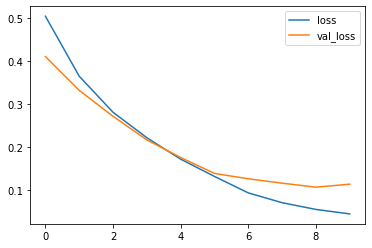

In [42]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

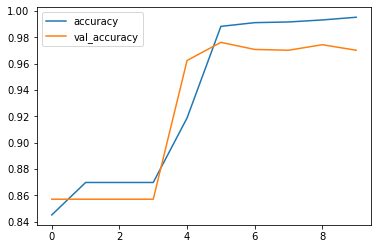

In [43]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
c